## What is survival analysis?

Customer survival analysis, also known as customer churn analysis or customer attrition analysis, is a technique used in machine learning and data analytics to predict and understand when and why customers are likely to stop using a product or service. The goal of customer survival analysis is to identify patterns and factors that contribute to customer churn, enabling businesses to take proactive measures to retain their customers.

In customer survival analysis, historical data about customer interactions, transactions, and behaviors are analyzed to build predictive models. These models estimate the probability of a customer churning within a specific time period, such as the next month or quarter. By examining various customer characteristics and behaviors, such as demographics, purchase history, customer service interactions, usage patterns, and engagement metrics, the models can identify factors that are strongly correlated with customer churn.

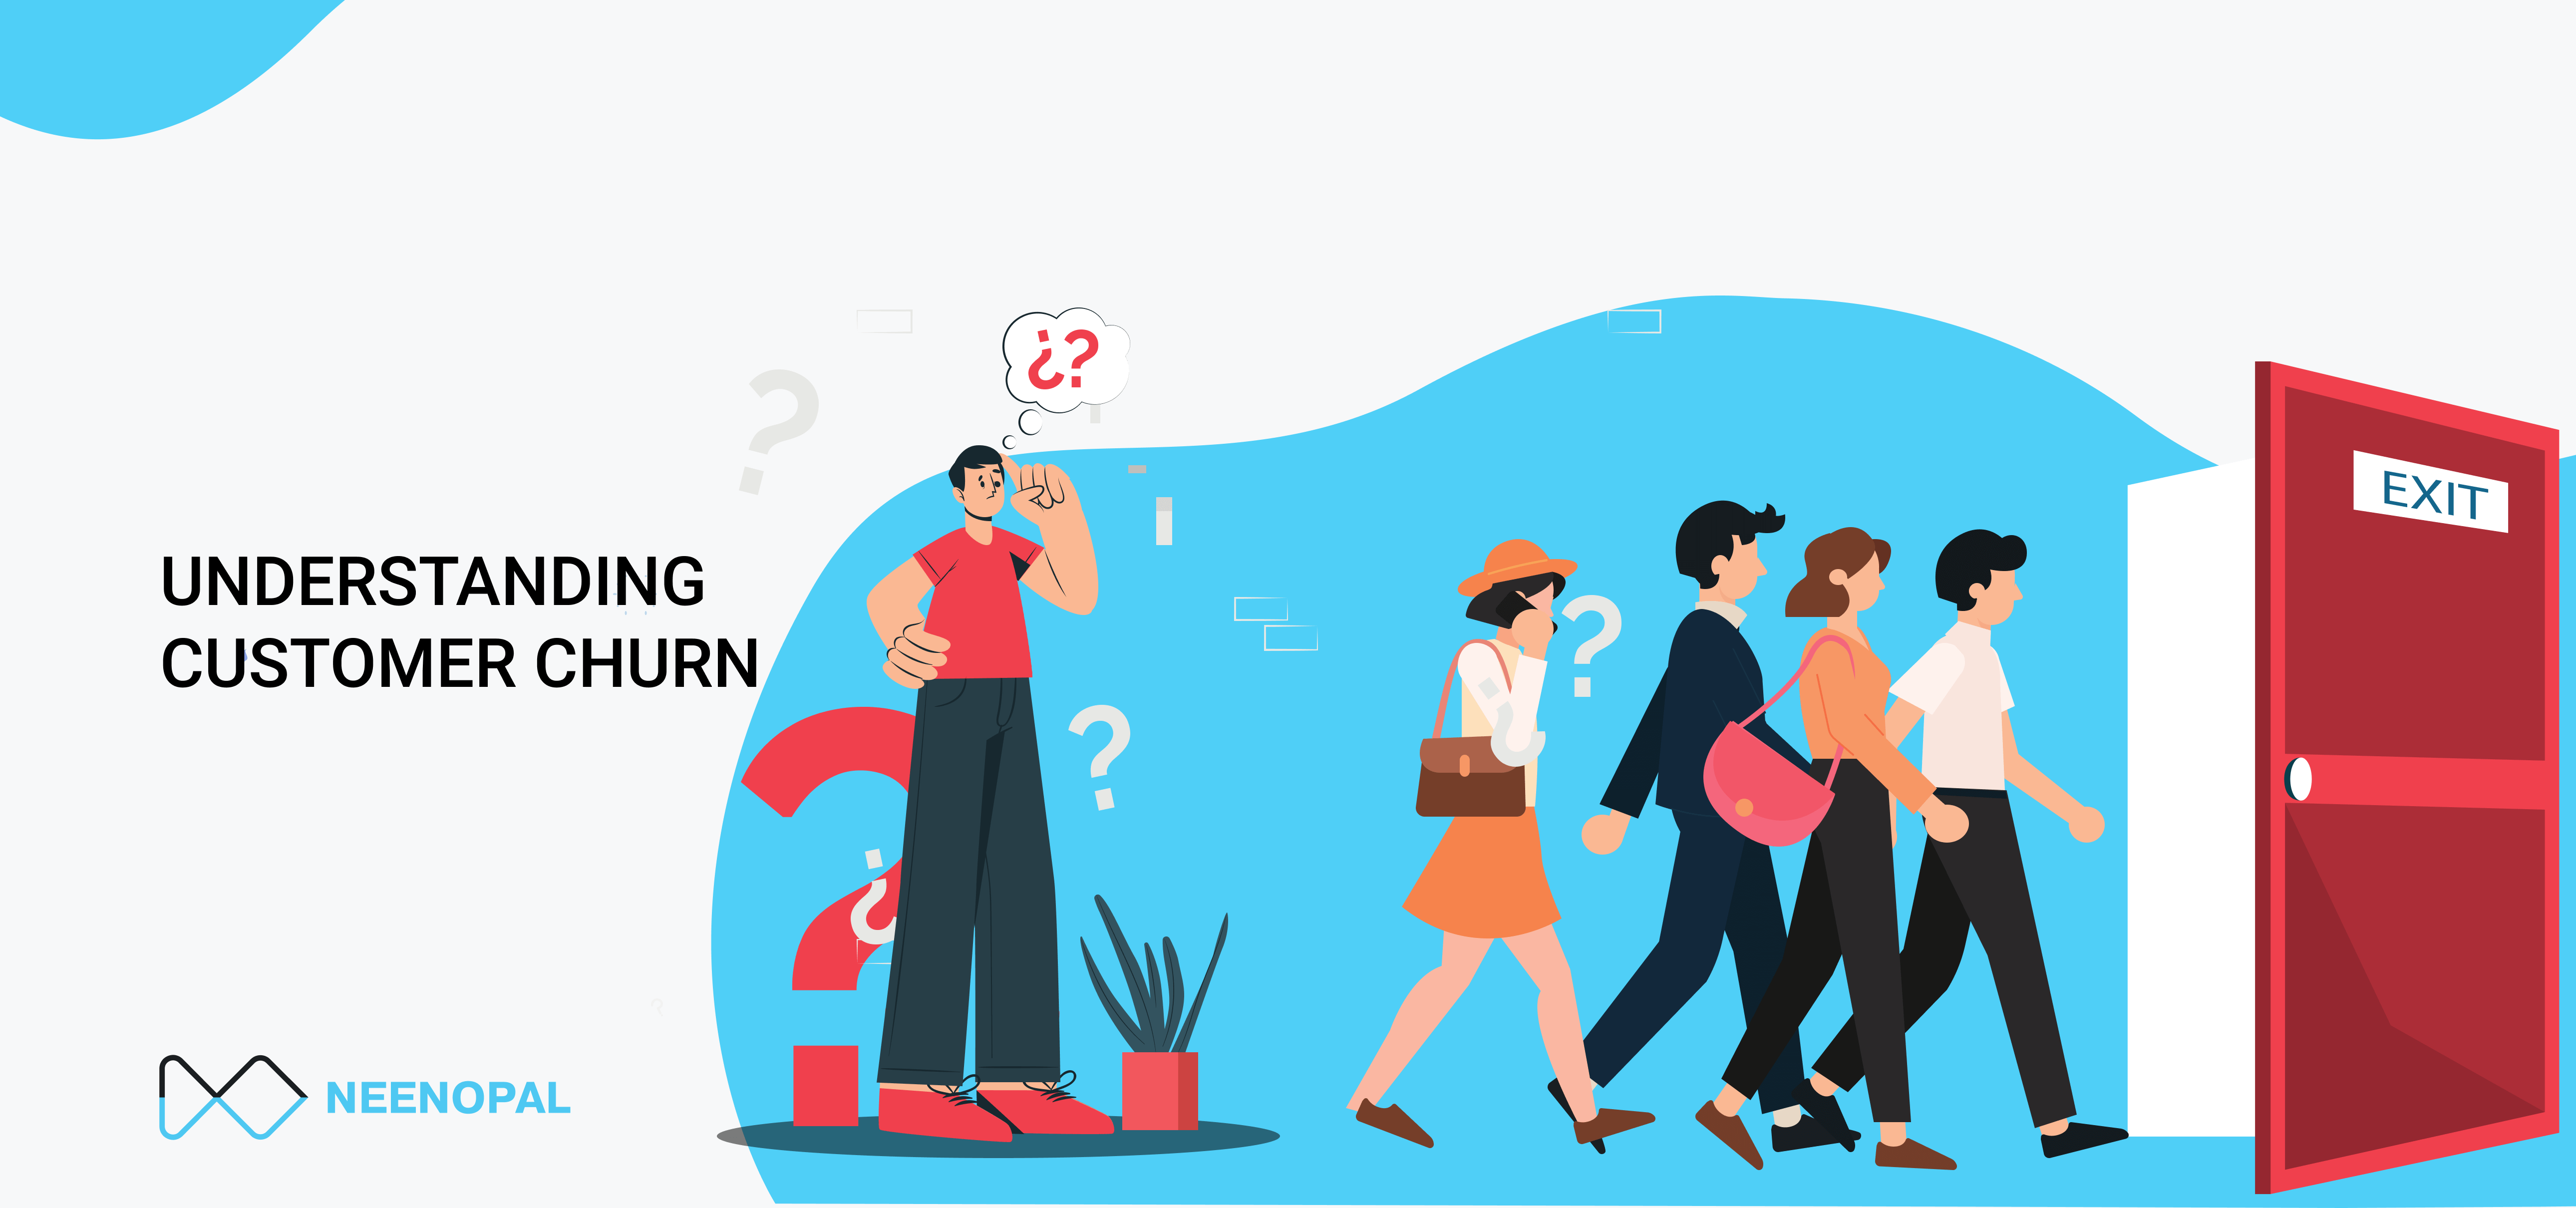

| Type of Customer Churn Survival Analysis | Description                                              |
|-----------------------------------------|----------------------------------------------------------|
| Cox Proportional Hazards Model           | A statistical model used to analyze the relationship     
|                                         | between customer characteristics and the hazard rate of   
|                                         | churn over time. It estimates the relative risk of churn |
|                                         | associated with various factors.                         |
|-----------------------------------------|----------------------------------------------------------|
| Kaplan-Meier Estimator                   | A non-parametric method used to estimate the survival    |
|                                         | function, which represents the probability of a customer |
|                                         | surviving (not churning) over time. It can be used to    |
|                                         | compare survival rates between different customer        |
|                                         | segments.                                                |
|-----------------------------------------|----------------------------------------------------------|
| Random Survival Forest                   | An extension of random forest algorithms for survival    |
|                                         | analysis. It combines decision trees with survival       |
|                                         | analysis techniques to predict customer churn            |
|                                         | probabilities over time. It can handle both categorical  |
|                                         | and continuous features effectively.                     |
|-----------------------------------------|----------------------------------------------------------|
| Deep Learning Models                     | Neural network models, such as recurrent neural networks |
|                                         | (RNNs) or long short-term memory (LSTM) networks, can    |
|                                         | be applied to analyze sequential customer data, such as  |
|                                         | time series of customer interactions or behaviors, to    |
|                                         | predict churn probabilities at different time intervals. |
|-----------------------------------------|----------------------------------------------------------|
|


In [54]:
!pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
#importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import statsmodels.api as st
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#Lifelines is a survival analysis package
from lifelines import KaplanMeierFitter
from lifelines.statistics import multivariate_logrank_test   
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter

In [56]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [58]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [59]:
df.Churn

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [60]:
df.Churn=labelencoder.fit_transform(df.Churn)
df.Churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [61]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']

In [62]:
survivaldata=pd.get_dummies(df,columns=categorical,drop_first=True)
survivaldata

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,34,56.95,1889.5,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,45,42.30,1840.75,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,2,70.70,151.65,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,84.80,1990.5,0,1,0,1,1,1,...,0,1,0,1,1,0,1,0,0,1
7039,2234-XADUH,72,103.20,7362.9,0,0,0,1,1,1,...,0,1,0,1,1,0,1,1,0,0
7040,4801-JZAZL,11,29.60,346.45,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,8361-LTMKD,4,74.40,306.6,1,1,1,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [63]:
survivaldata.drop(['customerID', 'tenure', 'Churn'], axis = 1, inplace= True)
survivaldata = st.add_constant(survivaldata, prepend=False)
survivaldata.head()

,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,const
0,29.85,29.85,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1.0
1,56.95,1889.5,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,1.0
2,53.85,108.15,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1.0
3,42.30,1840.75,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1.0
4,70.70,151.65,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,0,1.0


In [64]:
eventvar = df['Churn']
timevar = df['tenure']

In [65]:
timevar

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

# Survival Analysis
## Kaplan-Meier Curve

The Kaplan-Meier curve is a graphical representation of the survival function in survival analysis. It estimates the probability of survival over time for a given event, such as customer churn. The formula for calculating the Kaplan-Meier estimate at each time point is as follows:

```
S(t) = S(t-1) * (1 - d(t)/n(t))
```

Where:
- `S(t)` represents the estimated survival probability at time `t`.
- `S(t-1)` is the estimated survival probability at the previous time point.
- `d(t)` is the number of events (churns) observed at time `t`.
- `n(t)` represents the number of individuals (customers) at risk of the event at time `t`.



In [66]:
kmf = KaplanMeierFitter()

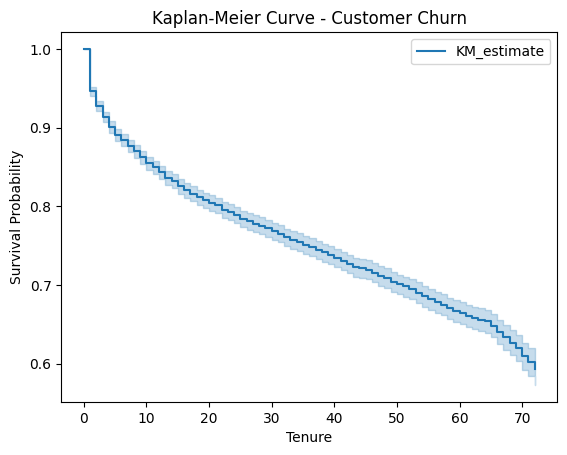

In [67]:
kmf.fit(timevar, eventvar)

# Plot the Kaplan-Meier curve
kmf.plot()

# Customize the plot
plt.title('Kaplan-Meier Curve - Customer Churn')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')

# Display the plot
plt.show()

As we can see, there is a sudden drop in the starting which says that after one tenure only customers starts churning rapidly and after that churning rate decreases. To deal with that we can consider giving more discounts on long-term plans and make more customers to subscribe for long term plans

The log-rank test is a statistical test used to compare the survival distributions between two or more groups in survival analysis. It determines whether there is a significant difference in survival probabilities among the groups. The formula for the log-rank test statistic is as follows:

```
χ² = Σ (O_i - E_i)² / Var_i
```

Where:
- `O_i` represents the observed number of events (churns) in each group.
- `E_i` represents the expected number of events (churns) in each group under the assumption of no difference in survival.
- `Var_i` is the variance of the number of events (churns) in each group.


## Gender

In [85]:
df['gender']=labelencoder.fit_transform(df.gender)

In [86]:
df.gender

0       0
1       1
2       1
3       1
4       0
       ..
7038    1
7039    0
7040    0
7041    1
7042    1
Name: gender, Length: 7043, dtype: int64

<lifelines.KaplanMeierFitter:"Female", fitted with 7043 total observations, 3555 right-censored observations>

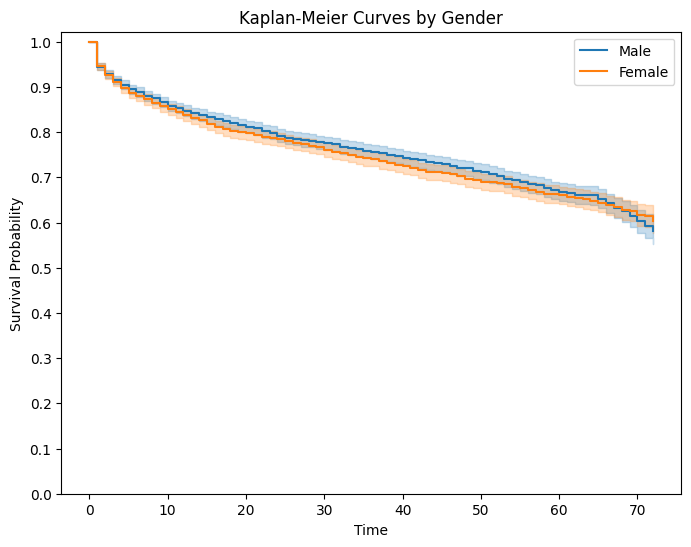

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.53 0.47      1.09

In [103]:


# Separate male and female customers
male = (df['gender'] == 1)
female = (df['gender'] == 0)

# Initialize the KaplanMeierFitter for male and female
kmf_male = KaplanMeierFitter()
kmf_female = KaplanMeierFitter()

# Fit the data for male and female customers
kmf_male.fit(timevar[male], event_observed=eventvar[male], label="Male")
kmf_female.fit(timevar[female], event_observed=eventvar[female], label="Female")

# Plot the Kaplan-Meier curves for male and female customers
plt.figure(figsize=(8, 6))
kmf_male.plot()
kmf_female.plot()

# Set the title, x-axis label, y-axis label, and legend
plt.title('Kaplan-Meier Curves by Gender')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()
plt.yticks(np.linspace(0,1,11))
plt.show()

# Perform the log-rank test
results = logrank_test(timevar[male], timevar[female],
                       event_observed_A=eventvar[male], event_observed_B=eventvar[female])

# Display the log-rank test results
results.print_summary()


In [80]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_encoded'],
      dtype='object')

## SeniorCitizens

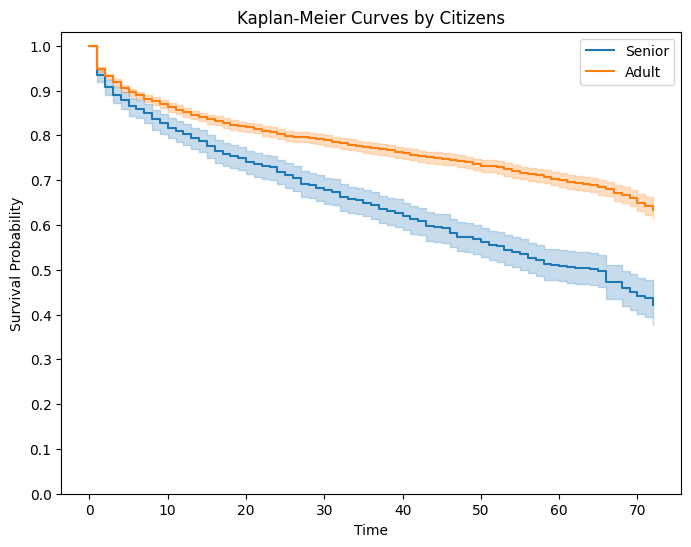

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         109.49 <0.005     82.71

In [107]:
senior=(df['SeniorCitizen'] == 1)
no_senior=(df['SeniorCitizen'] == 0)
kmf_senior = KaplanMeierFitter()
kmf_no_senior= KaplanMeierFitter()

kmf_senior.fit(timevar[senior],event_observed=eventvar[senior],label="Senior")
kmf_no_senior.fit(timevar[no_senior],event_observed=eventvar[no_senior],label="Adult")

plt.figure(figsize=(8, 6))
kmf_senior.plot()
kmf_no_senior.plot()

plt.title('Kaplan-Meier Curves by Citizens')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()


plt.yticks(np.linspace(0,1,11))
plt.show()
groups = logrank_test(timevar[senior], timevar[no_senior], event_observed_A=eventvar[senior], event_observed_B=eventvar[no_senior])
groups.print_summary()



## Partner

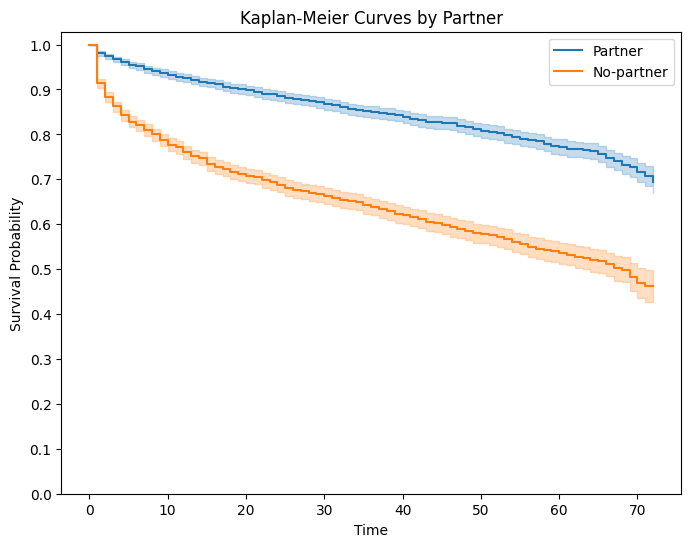

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         423.54 <0.005    310.21

In [110]:
df['Partner']=labelencoder.fit_transform(df.Partner)
partner=(df['Partner'] == 1)
no_partner=(df['Partner'] == 0)

kmf_partner = KaplanMeierFitter()
kmf_no_partner= KaplanMeierFitter()

kmf_partner.fit(timevar[partner],event_observed=eventvar[partner],label="Partner")
kmf_no_partner.fit(timevar[no_partner],event_observed=eventvar[no_partner],label="No-partner")

plt.figure(figsize=(8, 6))
kmf_partner.plot()

kmf_no_partner.plot()

plt.title('Kaplan-Meier Curves by Partner')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()


plt.yticks(np.linspace(0,1,11))
plt.show()
groups = logrank_test(timevar[partner], timevar[no_partner], event_observed_A=eventvar[partner], event_observed_B=eventvar[no_partner])
groups.print_summary()



## Dependents

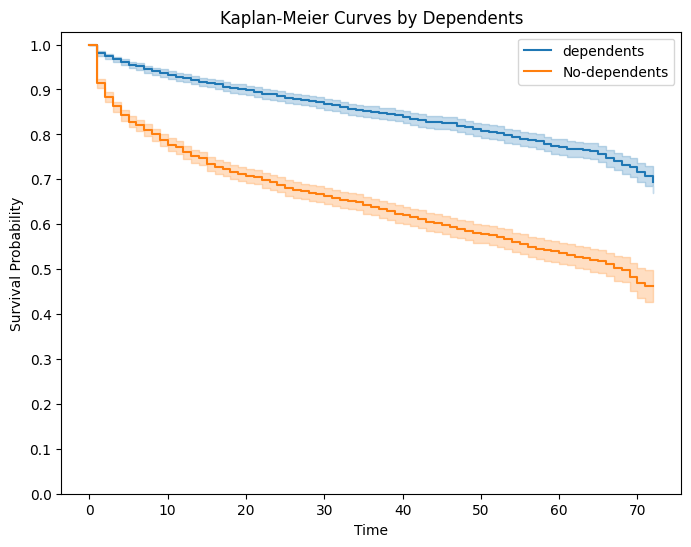

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         423.54 <0.005    310.21

In [111]:
df['Dependents']=labelencoder.fit_transform(df.Partner)
dependents=(df['Dependents'] == 1)
no_dependents=(df['Dependents'] == 0)

kmf_dependents = KaplanMeierFitter()
kmf_no_dependents= KaplanMeierFitter()

kmf_dependents.fit(timevar[dependents],event_observed=eventvar[dependents],label="dependents")
kmf_no_dependents.fit(timevar[no_dependents],event_observed=eventvar[no_dependents],label="No-dependents")

plt.figure(figsize=(8, 6))
kmf_dependents.plot()

kmf_no_dependents.plot()

plt.title('Kaplan-Meier Curves by Dependents')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()


plt.yticks(np.linspace(0,1,11))
plt.show()
groups = logrank_test(timevar[dependents], timevar[no_dependents], event_observed_A=eventvar[dependents], event_observed_B=eventvar[no_dependents])
groups.print_summary()



# PhoneService

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.43 0.51      0.97

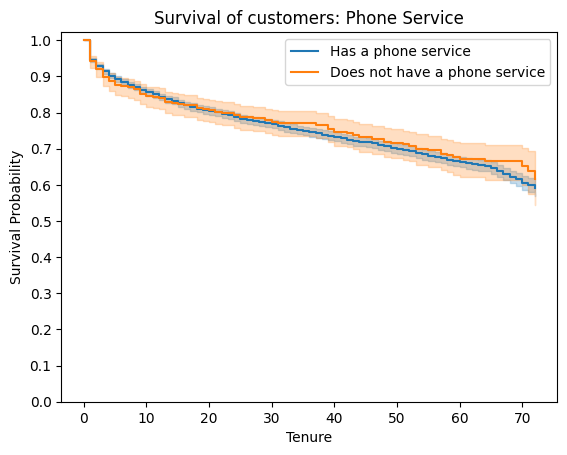

In [112]:
PhoneService = (survivaldata['PhoneService_Yes'] == 1)
no_PhoneService = (survivaldata['PhoneService_Yes'] == 0)

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[PhoneService],event_observed = eventvar[PhoneService],label = "Has a phone service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[no_PhoneService],event_observed = eventvar[no_PhoneService],label = "Does not have a phone service")
plot2 = kmf.plot(ax = plot1)
                 
plt.title('Survival of customers: Phone Service')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
groups = logrank_test(timevar[PhoneService], timevar[no_PhoneService], event_observed_A=eventvar[PhoneService], event_observed_B=eventvar[no_PhoneService])
groups.print_summary()

## MultipleLines

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
          30.97 <0.005     22.34

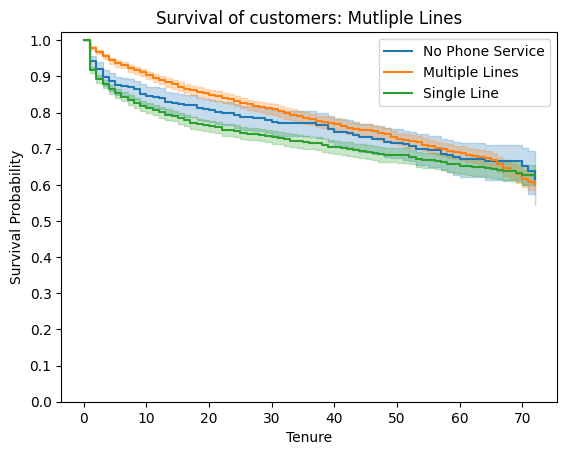

In [113]:
no_phone = (survivaldata['MultipleLines_No phone service'] == 1)
multiLines = (survivaldata['MultipleLines_Yes'] == 1)
no_multiLines = ((survivaldata['MultipleLines_Yes'] == 0) & (survivaldata['MultipleLines_No phone service'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[no_phone],event_observed = eventvar[no_phone],label = "No Phone Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[multiLines],event_observed = eventvar[multiLines],label = "Multiple Lines")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[no_multiLines],event_observed = eventvar[no_multiLines],label = "Single Line")
plot3 = kmf.plot(ax = plot2)
                 
plt.title('Survival of customers: Mutliple Lines')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'], df['MultipleLines'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

## Internet Service

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         520.12 <0.005    375.19

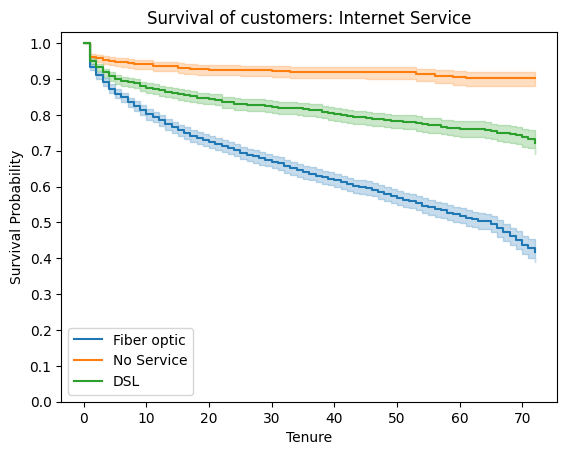

In [114]:
Fiber_optic = (survivaldata['InternetService_Fiber optic'] == 1)
No_Service = (survivaldata['InternetService_No'] == 1)
DSL = ((survivaldata['InternetService_Fiber optic'] == 0) & (survivaldata['InternetService_No'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[Fiber_optic],event_observed = eventvar[Fiber_optic],label = "Fiber optic")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[No_Service],event_observed = eventvar[No_Service],label = "No Service")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[DSL],event_observed = eventvar[DSL],label = "DSL")
plot3 = kmf.plot(ax = plot2)
                 
plt.title('Survival of customers: Internet Service')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'], df['InternetService'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

## Online Security

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
        1013.86 <0.005    731.35

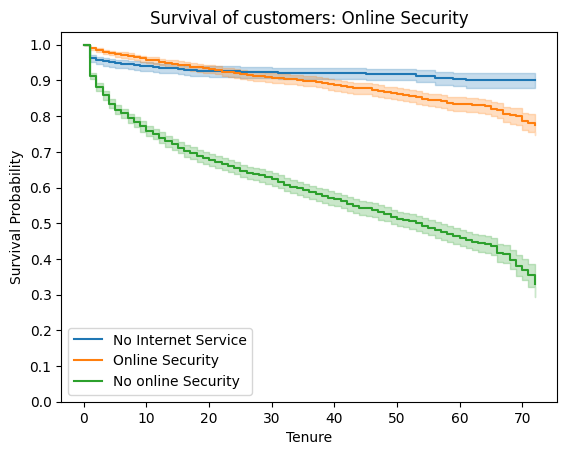

In [115]:
no_internetService = (survivaldata['OnlineSecurity_No internet service'] == 1)
onlineSecurity = (survivaldata['OnlineSecurity_Yes'] == 1)
no_onlineSecurity = ((survivaldata['OnlineSecurity_No internet service'] == 0) & (survivaldata['OnlineSecurity_Yes'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[no_internetService],event_observed = eventvar[no_internetService],label = "No Internet Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[onlineSecurity],event_observed = eventvar[onlineSecurity],label = "Online Security")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[no_onlineSecurity],event_observed = eventvar[no_onlineSecurity],label = "No online Security")
plot3 = kmf.plot(ax = plot2)
                 
plt.title('Survival of customers: Online Security')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'], df['OnlineSecurity'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

## Online Backup

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         821.34 <0.005    592.47

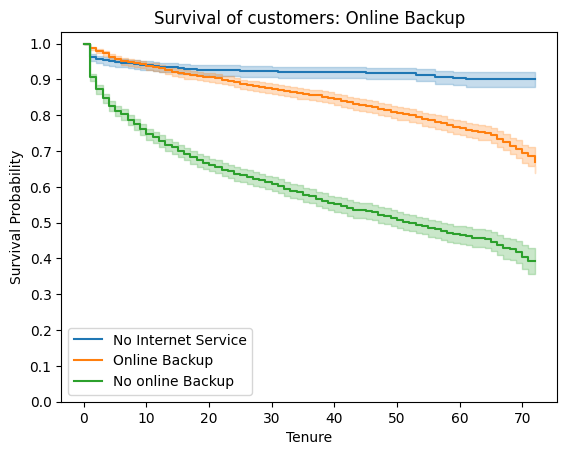

In [116]:
no_internetService = (survivaldata['OnlineBackup_No internet service'] == 1)
onlineBackup = (survivaldata['OnlineBackup_Yes'] == 1)
no_onlineBackup = ((survivaldata['OnlineBackup_No internet service'] == 0) & (survivaldata['OnlineBackup_Yes'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[no_internetService],event_observed = eventvar[no_internetService],label = "No Internet Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[onlineBackup],event_observed = eventvar[onlineBackup],label = "Online Backup")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[no_onlineBackup],event_observed = eventvar[no_onlineBackup],label = "No online Backup")
plot3 = kmf.plot(ax = plot2)
                 
plt.title('Survival of customers: Online Backup')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'], df['OnlineBackup'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

## Device Protection

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         763.51 <0.005    550.75

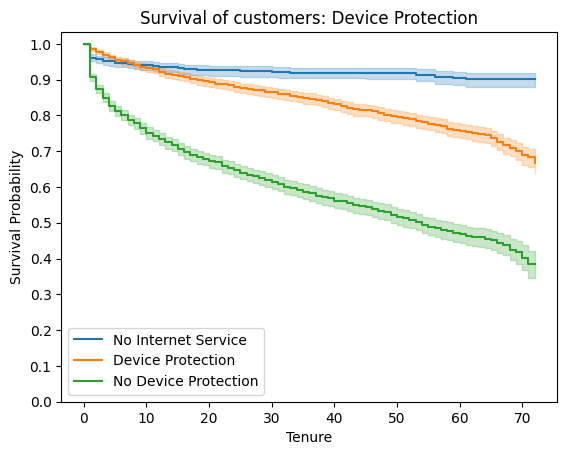

In [117]:
no_internetService = (survivaldata['DeviceProtection_No internet service'] == 1)
DeviceProtection = (survivaldata['DeviceProtection_Yes'] == 1)
no_DeviceProtection = ((survivaldata['DeviceProtection_No internet service'] == 0) & (survivaldata['DeviceProtection_Yes'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[no_internetService],event_observed = eventvar[no_internetService],label = "No Internet Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[DeviceProtection],event_observed = eventvar[DeviceProtection],label = "Device Protection")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[no_DeviceProtection],event_observed = eventvar[no_DeviceProtection],label = "No Device Protection")
plot3 = kmf.plot(ax = plot2)
                 
plt.title('Survival of customers: Device Protection')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'], df['DeviceProtection'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

## Tech Support

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         989.56 <0.005    713.82

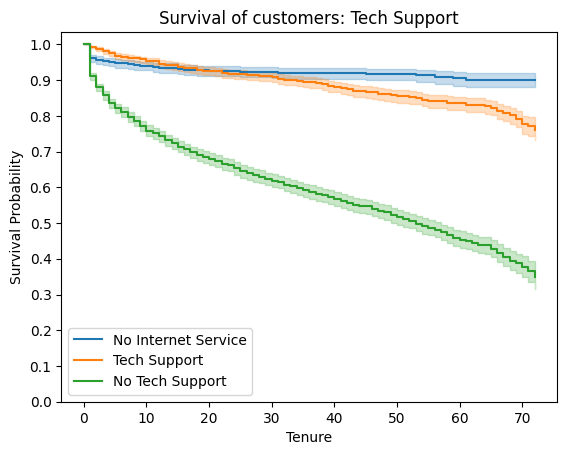

In [118]:
no_internetService = (survivaldata['TechSupport_No internet service'] == 1)
TechSupport = (survivaldata['TechSupport_Yes'] == 1)
no_TechSupport = ((survivaldata['TechSupport_No internet service'] == 0) & (survivaldata['TechSupport_Yes'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[no_internetService],event_observed = eventvar[no_internetService],label = "No Internet Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[TechSupport],event_observed = eventvar[TechSupport],label = "Tech Support")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[no_TechSupport],event_observed = eventvar[no_TechSupport],label = "No Tech Support")
plot3 = kmf.plot(ax = plot2)
                 
plt.title('Survival of customers: Tech Support')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'], df['TechSupport'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

## Streaming TV

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         368.31 <0.005    265.68

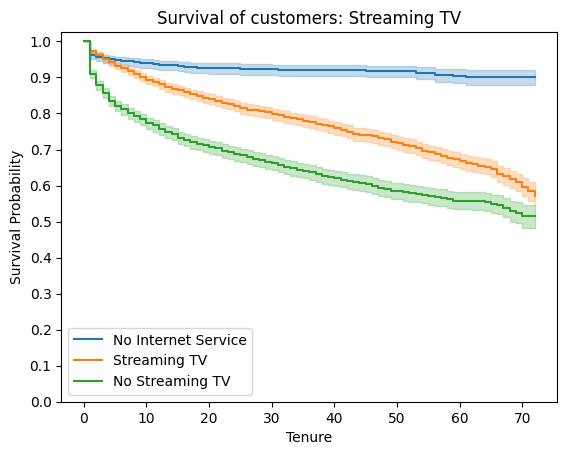

In [119]:
no_internetService = (survivaldata['StreamingTV_No internet service'] == 1)
StreamingTV = (survivaldata['StreamingTV_Yes'] == 1)
no_StreamingTV = ((survivaldata['StreamingTV_No internet service'] == 0) & (survivaldata['StreamingTV_Yes'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[no_internetService],event_observed = eventvar[no_internetService],label = "No Internet Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[StreamingTV],event_observed = eventvar[StreamingTV],label = "Streaming TV")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[no_StreamingTV],event_observed = eventvar[no_StreamingTV],label = "No Streaming TV")
plot3 = kmf.plot(ax = plot2)
                 
plt.title('Survival of customers: Streaming TV')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'], df['StreamingTV'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

## Streaming Movies

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         378.43 <0.005    272.98

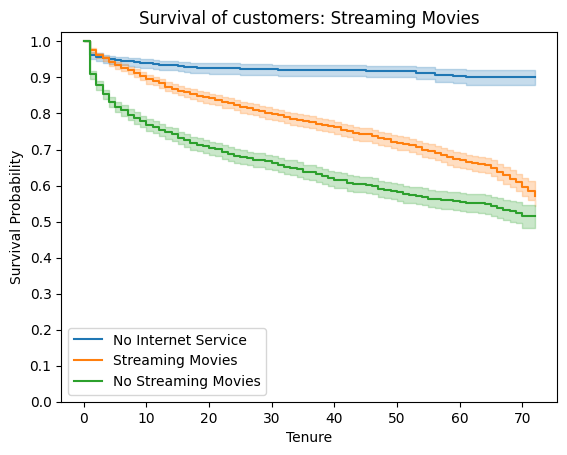

In [120]:
no_internetService = (survivaldata['StreamingMovies_No internet service'] == 1)
StreamingMovies = (survivaldata['StreamingMovies_Yes'] == 1)
no_StreamingMovies = ((survivaldata['StreamingMovies_No internet service'] == 0) & (survivaldata['StreamingMovies_Yes'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[no_internetService],event_observed = eventvar[no_internetService],label = "No Internet Service")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[StreamingMovies],event_observed = eventvar[StreamingMovies],label = "Streaming Movies")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[no_StreamingMovies],event_observed = eventvar[no_StreamingMovies],label = "No Streaming Movies")
plot3 = kmf.plot(ax = plot2)
                 
plt.title('Survival of customers: Streaming Movies')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'], df['StreamingMovies'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

## Contract

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
        2352.87 <0.005       inf

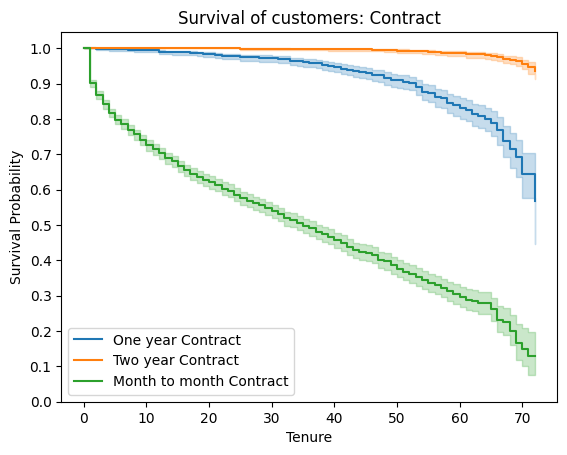

In [121]:
Contract_One_year = (survivaldata['Contract_One year'] == 1)
Contract_Two_year = (survivaldata['Contract_Two year'] == 1)
Contract_month_to_month = ((survivaldata['Contract_One year'] == 0) & (survivaldata['Contract_Two year'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[Contract_One_year],event_observed = eventvar[Contract_One_year],label = "One year Contract")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[Contract_Two_year],event_observed = eventvar[Contract_Two_year],label = "Two year Contract")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[Contract_month_to_month],event_observed = eventvar[Contract_month_to_month],label = "Month to month Contract")
plot3 = kmf.plot(ax = plot2)
                 
plt.title('Survival of customers: Contract')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'], df['Contract'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

## Payment Method

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 3
             alpha = 0.95
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         865.24 <0.005    619.58

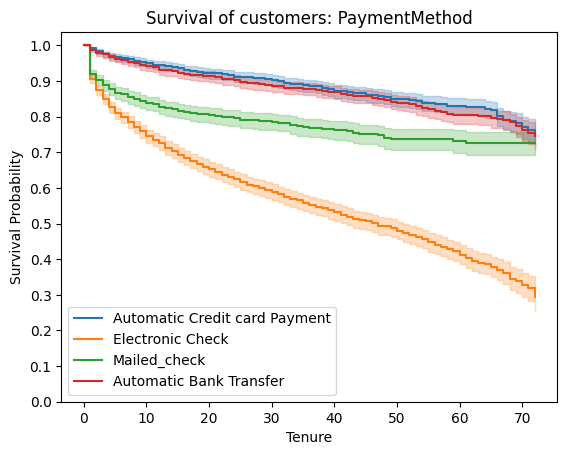

In [122]:
automatic_Credit_Card = (survivaldata['PaymentMethod_Credit card (automatic)'] == 1)
electronic_check = (survivaldata['PaymentMethod_Electronic check'] == 1)
mailed_check = (survivaldata['PaymentMethod_Mailed check'] == 1)
automatic_Bank_Transfer = ((survivaldata['PaymentMethod_Credit card (automatic)'] == 0) & (survivaldata['PaymentMethod_Electronic check'] == 0) & (survivaldata['PaymentMethod_Mailed check'] == 0))

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[automatic_Credit_Card],event_observed = eventvar[automatic_Credit_Card],label = "Automatic Credit card Payment")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[electronic_check],event_observed = eventvar[electronic_check],label = "Electronic Check")
plot2 = kmf.plot(ax = plot1)

kmf.fit(timevar[mailed_check],event_observed = eventvar[mailed_check],label = "Mailed_check")
plot3 = kmf.plot(ax = plot2)

kmf.fit(timevar[automatic_Bank_Transfer],event_observed = eventvar[automatic_Bank_Transfer],label = "Automatic Bank Transfer")
plot4 = kmf.plot(ax = plot3)
                 
plt.title('Survival of customers: PaymentMethod')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
twoplusgroups_logrank = multivariate_logrank_test(df['tenure'], df['PaymentMethod'], df['Churn'], alpha = 0.95)
twoplusgroups_logrank.print_summary()

## Paperless Billing

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         189.51 <0.005    140.82

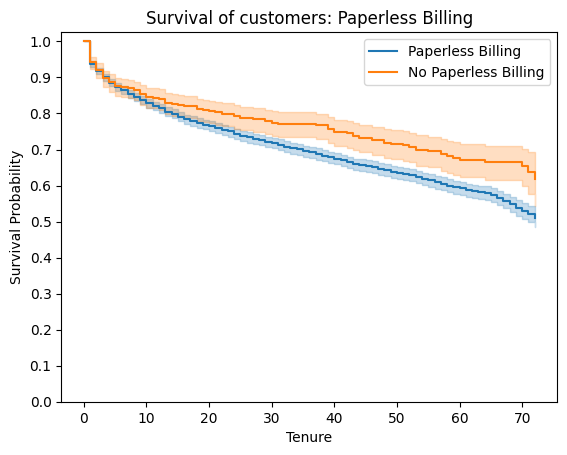

In [123]:
PaperlessBilling = (survivaldata['PaperlessBilling_Yes'] == 1)
no_PaperlessBilling = (survivaldata['PaperlessBilling_Yes'] == 0)

plt.figure()
ax = plt.subplot(1,1,1)

kmf.fit(timevar[PaperlessBilling],event_observed = eventvar[PaperlessBilling],label = "Paperless Billing")
plot1 = kmf.plot(ax = ax)

kmf.fit(timevar[no_PhoneService],event_observed = eventvar[no_PhoneService],label = "No Paperless Billing")
plot2 = kmf.plot(ax = plot1)
                 
plt.title('Survival of customers: Paperless Billing')
plt.xlabel('Tenure')
plt.ylabel('Survival Probability')
plt.yticks(np.linspace(0,1,11))
groups = logrank_test(timevar[PaperlessBilling], timevar[no_PaperlessBilling], event_observed_A=eventvar[PaperlessBilling], event_observed_B=eventvar[no_PaperlessBilling])
groups.print_summary()

In [124]:
def datapreparation(filepath):
    
    df = pd.read_csv(filepath)
    df.drop(["customerID"], inplace = True, axis = 1)
    
    df.TotalCharges = df.TotalCharges.replace(" ",np.nan)
    df.TotalCharges.fillna(0, inplace = True)
    df.TotalCharges = df.TotalCharges.astype(float)
    
    cols1 = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']
    for col in cols1:
        df[col] = df[col].apply(lambda x: 0 if x == "No" else 1)
   
    df.gender = df.gender.apply(lambda x: 0 if x == "Male" else 1)
    df.MultipleLines = df.MultipleLines.map({'No phone service': 0, 'No': 0, 'Yes': 1})
    
    cols2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in cols2:
        df[col] = df[col].map({'No internet service': 0, 'No': 0, 'Yes': 1})
    
    df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)
    
    return df

In [125]:
regression_df = datapreparation("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
regression_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,0,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,1,0,0,0,0,1,0


Survival Regression Ananlysis using Cox Proportional Hazard model

In [126]:
cph = CoxPHFitter()
cph.fit(regression_df, duration_col='tenure', event_col='Churn')

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -12659.69
         time fit was run = 2023-05-19 06:36:24 UTC

---
                                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                     
gender                                  0.04       1.04       0.05            -0.05             0.13                 0.95                 1.14
SeniorCitizen                           0.03       1.04       0.06            -0.08             0.15                 0.93                 1.16
Partner                                -0.18       0.84       0.06            -0.29            -0.07                 0.75                 0.93
Dependents                             -0.09       0.91       0.07            -0.23             0.05                 0.80                 1.05
PhoneService                            0.83       2.29       0.47            -0.10             1.76                 0.90                 5.80
MultipleLines                           0.09       1.09       0.13            -0.16             0.33                 0.85                 1.40
OnlineSecurity                         -0.21       0.81       0.13            -0.47             0.05                 0.62                 1.05
OnlineBackup                           -0.06       0.95       0.13            -0.31             0.19                 0.74                 1.21
DeviceProtection                        0.09       1.09       0.13            -0.16             0.34                 0.85                 1.40
TechSupport                            -0.08       0.92       0.13            -0.34             0.17                 0.71                 1.19
StreamingTV                             0.28       1.32       0.24            -0.18             0.74                 0.83                 2.10
StreamingMovies                         0.29       1.33       0.24            -0.18             0.75                 0.84                 2.11
PaperlessBilling                        0.15       1.16       0.06             0.04             0.26                 1.04                 1.30
MonthlyCharges                          0.01       1.01       0.02            -0.03             0.06                 0.97                 1.06
TotalCharges                           -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
InternetService_Fiber optic             1.02       2.77       0.58            -0.12             2.15                 0.89                 8.59
InternetService_No                     -2.34       0.10       0.60            -3.51            -1.17                 0.03                 0.31
Contract_One year                      -1.27       0.28       0.10            -1.46            -1.07                 0.23                 0.34
Contract_Two year                      -3.70       0.02       0.20            -4.10            -3.31                 0.02                 0.04
PaymentMethod_Credit card (automatic)  -0.01       0.99       0.09            -0.19             0.17                 0.83                 1.18
PaymentMethod_Electronic check          0.39       1.47       0.07             0.24             0.53                 1.28                 1.70
PaymentMethod_Mailed check              0.51       1.67       0.09             0.34             0.68                 1.40                 1.98

                                        cmp to      z      p   -log2(p)
covariate                                                              
gender                                    0.00   0.85   0.

In [152]:
from lifelines import CoxPHFitter

In [154]:
test_id = regression_df.sample(1)


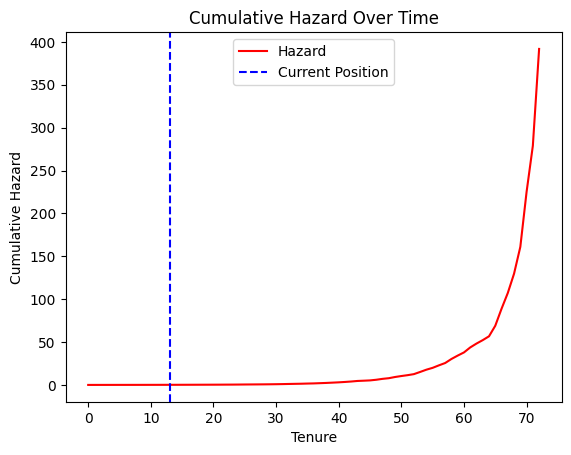

In [155]:

fig, ax = plt.subplots()
cph.predict_cumulative_hazard(test_id).plot(ax = ax, color = 'red')
plt.axvline(x=test_id.tenure.values[0], color = 'blue', linestyle='--')
plt.legend(labels=['Hazard','Current Position'])
ax.set_xlabel('Tenure', size = 10)
ax.set_ylabel('Cumulative Hazard', size = 10)
ax.set_title('Cumulative Hazard Over Time');



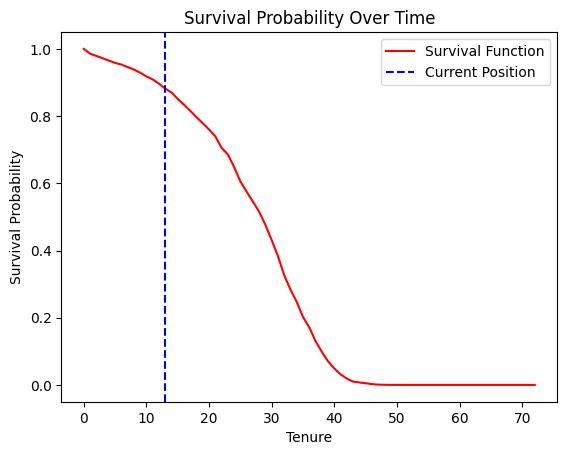

In [156]:
fig, ax = plt.subplots()
cph.predict_survival_function(test_id).plot(ax = ax, color = 'red')
plt.axvline(x=test_id.tenure.values[0], color = 'blue', linestyle='--')
plt.legend(labels=['Survival Function','Current Position'])
ax.set_xlabel('Tenure', size = 10)
ax.set_ylabel('Survival Probability', size = 10)
ax.set_title('Survival Probability Over Time');

In [157]:
import pickle
pickle.dump(cph, open('survivemodel.pkl','wb'))

Customer Lifetime Value

To calculate customer lifetime value, I would multiply the Monthly charges the customer is paying to Telcom and the expected life time of the customer.

I utilize the survival function of a customer to calculate its expected life time. I would like to be little bit conservative and consider the customer is churned when the survival probability of him is 10%.

In [158]:
def LTV(info):
    life = cph.predict_survival_function(info).reset_index()
    life.columns = ['Tenure', 'Probability']
    max_life = life.Tenure[life.Probability > 0.1].max()
    
    LTV = max_life * info['MonthlyCharges'].values[0]
    return LTV

In [159]:
print('LTV of a testid is:', LTV(test_id), 'dollars.')

LTV of a testid is: 930.55 dollars.


In [161]:
info=regression_df.sample(1)

In [174]:
life=cph.predict_survival_function(info).reset_index()
life.columns = ['Tenure', 'Probability']
max_life = life.Tenure[life.Probability > 0.1].max()
LTV = max_life * info['MonthlyCharges'].values[0]
LTV

6984.0